# ML FINAL PROJECT - Kepler Exoplanet Prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cumulative.csv")
df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

### We check for null values.

In [4]:
df.isnull().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff   

In [5]:
df.koi_disposition.value_counts()

koi_disposition
FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: count, dtype: int64

### Removing unrelated columns.

In [6]:
df = df.drop(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_tce_delivname'], axis=1)

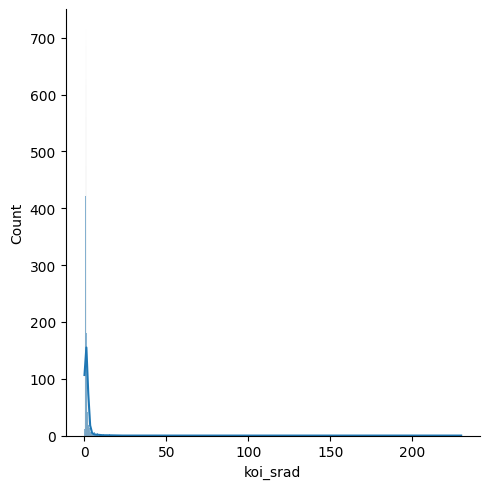

In [7]:
sns.displot(df.koi_srad, kde=True)

In [8]:
df.koi_srad.describe()

count    9201.000000
mean        1.728712
std         6.127185
min         0.109000
25%         0.829000
50%         1.000000
75%         1.345000
max       229.908000
Name: koi_srad, dtype: float64

### Plotting histogram of all integer and float columns to check for categorical data.

In [9]:
# df_graphs = df.drop(["koi_disposition", "koi_pdisposition"], axis=1)
# plt.figure(figsize=(20, 100))
# for (i, j) in zip(df_graphs.columns, range(1, len(df_graphs.columns)+1)):
#         plt.subplot(23, 2, j)
#         sns.distplot(df_graphs[i], kde=True)

### Removing "koi_teq_err1" and "koi_teq_err2" because they are empty columns.

In [10]:
df = df.drop(["koi_teq_err1", "koi_teq_err2"], axis=1)

In [11]:
df.koi_tce_plnt_num.value_counts()

koi_tce_plnt_num
1.0    7745
2.0     972
3.0     326
4.0     111
5.0      41
6.0      14
7.0       8
8.0       1
Name: count, dtype: int64

In [12]:
df.columns

Index(['koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',
       'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra',
       'dec', 'koi_kepmag'],
      dtype='object')

### After some observations, the following columns are detected to contain categorical data and are thus stored in a list.

In [13]:
categorical_data = ["koi_disposition", "koi_pdisposition", "koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec", "koi_tce_plnt_num"]

In [14]:
df.isnull().mean()

koi_disposition      0.000000
koi_pdisposition     0.000000
koi_score            0.157884
koi_fpflag_nt        0.000000
koi_fpflag_ss        0.000000
koi_fpflag_co        0.000000
koi_fpflag_ec        0.000000
koi_period           0.000000
koi_period_err1      0.047470
koi_period_err2      0.047470
koi_time0bk          0.000000
koi_time0bk_err1     0.047470
koi_time0bk_err2     0.047470
koi_impact           0.037955
koi_impact_err1      0.047470
koi_impact_err2      0.047470
koi_duration         0.000000
koi_duration_err1    0.047470
koi_duration_err2    0.047470
koi_depth            0.037955
koi_depth_err1       0.047470
koi_depth_err2       0.047470
koi_prad             0.037955
koi_prad_err1        0.037955
koi_prad_err2        0.037955
koi_teq              0.037955
koi_insol            0.033563
koi_insol_err1       0.033563
koi_insol_err2       0.033563
koi_model_snr        0.037955
koi_tce_plnt_num     0.036177
koi_steff            0.037955
koi_steff_err1       0.048934
koi_steff_

### Plotting boxplot of every numerical data columns to look for outliers.

In [15]:
len(df.drop(categorical_data, axis=1).columns)

36

In [16]:
# df_graphs2 = df.drop(categorical_data, axis=1)

# plt.figure(figsize=(20, 100))
# for (i, j) in zip(df_graphs2.columns, range(1, len(df_graphs2.columns)+1)):
#         plt.subplot(18, 2, j)
#         sns.boxplot(df_graphs2[i])

### Checking the amount of outlier data in each column to decide whether to remove rows or not. Outliers are not to be removed if they exceed 20 quantity.

In [17]:
df.koi_insol.describe()

count    9.243000e+03
mean     7.745737e+03
std      1.592047e+05
min      0.000000e+00
25%      2.015000e+01
50%      1.416000e+02
75%      8.702900e+02
max      1.094755e+07
Name: koi_insol, dtype: float64

In [18]:
print(len(df[(df.koi_kepmag < 12) | (df.koi_kepmag > 16)]))
print(len(df[(df.koi_srad > 120)]))
print(len(df[(df.koi_srad_err1 > 24)]))
print(len(df[(df.koi_srad_err2 < -30)]))
print(len(df[(df.koi_slogg_err1 > 1.1)]))

878
7
3
6
4


In [19]:
print(len(df[(df.koi_steff > 14000)]))
print(len(df[(df.koi_steff_err1 < 50) | (df.koi_steff_err1 > 500)]))
print(len(df[(df.koi_steff_err2 < -1250)]))
print(len(df[(df.koi_insol > 0.4e+07)]))
print(len(df[(df.koi_insol_err1 > 1.25e+06)]))
print(len(df[(df.koi_insol_err2 < -2e+06)]))

1
52
3
3
5
2


In [20]:
print(len(df[(df.koi_prad > 50000)]))
print(len(df[(df.koi_prad_err1 > 4000)]))
print(len(df[(df.koi_prad_err2 < -30000)]))
print(len(df[(df.koi_teq > 8000)]))

4
9
3
11


In [21]:
print(len(df[(df.koi_depth > 1.2e+06)]))
print(len(df[(df.koi_depth_err1 > 40000)]))
print(len(df[(df.koi_depth_err2 < -40000)]))
print(len(df[(df.koi_duration > 100)]))
print(len(df[(df.koi_duration_err1 > 12.5)]))
print(len(df[(df.koi_duration_err2 < -10)]))

1
2
2
2
2
5


In [22]:
print(len(df[(df.koi_impact > 60)]))
print(len(df[(df.koi_impact_err1 > 80)]))
print(len(df[(df.koi_impact_err2 < -20)]))
print(len(df[(df.koi_time0bk > 700)]))
print(len(df[(df.koi_time0bk_err1 > 0.4)]))
print(len(df[(df.koi_time0bk_err2 < -0.4)]))
print(len(df[(df.koi_period > 800)]))

14
1
9
4
7
7
12


### Eliminating all rows containing outliers. Total 472 rows removed. The values have been carefully picked after closely observing the boxplots.

In [23]:
df2 = (df[(df.koi_impact < 60)])
df2 = (df[(df.koi_impact_err1 < 80)])
df2 = (df[(df.koi_impact_err2 > -20)])
df2 = (df[(df.koi_time0bk < 700)])
df2 = (df[(df.koi_time0bk_err1 < 0.5)])
df2 = (df[(df.koi_time0bk_err2 > -0.5)])
df2 = (df[(df.koi_period < 80000)])
df2 = (df[(df.koi_depth < 1.2e+06)])
df2 = (df[(df.koi_depth_err1 < 50000)])
df2 = (df[(df.koi_depth_err2 > -50000)])
df2 = (df[(df.koi_duration < 100)])
df2 = (df[(df.koi_duration_err1 < 12.5)])
df2 = (df[(df.koi_duration_err2 > -10)])
df2 = (df[(df.koi_prad < 50000)])
df2 = (df[(df.koi_prad_err1 < 4000)])
df2 = (df[(df.koi_prad_err2 > -30000)])
df2 = (df[(df.koi_teq < 11000)])
df2 = (df[(df.koi_steff_err2 > -1250)])
df2 = (df[(df.koi_insol < 0.4e+07)])
df2 = (df[(df.koi_insol_err1 < 1.25e+06)])
df2 = (df[(df.koi_insol_err2 > -1.5e+06)])
df2 = (df[(df.koi_steff < 14000)])
df2 = (df[(df.koi_srad < 150)])
df2 = (df[(df.koi_srad_err1 < 23)])
df2 = (df[(df.koi_srad_err2 > -40)])
df2 = (df[(df.koi_slogg_err1 < 1.1)])

df2

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,8.589871,1.850000e-04,-1.850000e-04,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [24]:
df2["koi_disposition"].value_counts()

koi_disposition
FALSE POSITIVE    4624
CONFIRMED         2292
CANDIDATE         2176
Name: count, dtype: int64

In [25]:
df_candidates = df2[(df2["koi_disposition"] == "CANDIDATE")]
df_candidates

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
37,CANDIDATE,CANDIDATE,1.000,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,...,-77.0,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263
58,CANDIDATE,CANDIDATE,0.999,0,0,0,0,40.419504,1.140000e-04,-1.140000e-04,...,-163.0,4.507,0.116,-0.105,0.781,0.116,-0.095,294.31686,50.080231,15.487
62,CANDIDATE,CANDIDATE,0.993,0,0,0,0,7.240661,1.620000e-05,-1.620000e-05,...,-79.0,4.595,0.012,-0.064,0.765,0.055,-0.028,293.83331,50.230350,15.334
63,CANDIDATE,CANDIDATE,0.871,0,0,0,0,3.435916,4.730000e-05,-4.730000e-05,...,-115.0,4.339,0.132,-0.108,1.087,0.157,-0.142,287.88733,46.276241,12.791
72,CANDIDATE,CANDIDATE,0.773,0,0,0,0,1.626630,1.020000e-06,-1.020000e-06,...,-172.0,4.410,0.124,-0.186,0.973,0.270,-0.145,294.36819,38.310280,15.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550,CANDIDATE,CANDIDATE,0.532,0,0,0,0,4.736816,1.470000e-04,-1.470000e-04,...,-201.0,4.456,0.056,-0.224,1.011,0.329,-0.110,289.20331,44.505138,13.922
9551,CANDIDATE,CANDIDATE,0.386,0,0,0,0,130.235324,3.030000e-03,-3.030000e-03,...,-183.0,4.529,0.036,-0.192,0.903,0.251,-0.084,289.57452,44.519939,15.991
9557,CANDIDATE,CANDIDATE,1.000,0,0,0,0,8.870416,9.020000e-06,-9.020000e-06,...,-181.0,4.027,0.434,-0.186,1.514,0.426,-0.640,290.14914,50.239178,13.579
9558,CANDIDATE,CANDIDATE,1.000,0,0,0,0,47.109631,1.940000e-04,-1.940000e-04,...,-159.0,3.597,0.968,-0.242,2.780,1.089,-2.022,296.15601,44.920090,13.731


In [26]:
df2_non_candidates = df2[(df2["koi_disposition"] != "CANDIDATE")]
df2_non_candidates

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9556,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,23.627035,2.260000e-04,-2.260000e-04,...,-185.0,4.477,0.099,-0.121,0.857,0.138,-0.101,299.21881,44.181862,16.375
9559,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,8.589871,1.850000e-04,-1.850000e-04,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9562,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [27]:
x_train, x_test, y_train, y_test = train_test_split(df2_non_candidates.drop(["koi_disposition"], axis=1), df2_non_candidates["koi_disposition"], test_size=0.3, random_state=1)

In [28]:
categorical_train_data = ["koi_pdisposition", "koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec", "koi_tce_plnt_num"]

In [29]:
numerical_train_data = x_train.drop(categorical_train_data, axis=1).columns
numerical_train_data

Index(['koi_score', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [30]:
x_train

,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
2619,FALSE POSITIVE,0.000,0,0,1,0,5.548680,7.540000e-05,-7.540000e-05,133.928500,...,-105.0,4.514,0.055,-0.055,0.835,0.063,-0.057,300.93738,45.490070,12.837
2137,CANDIDATE,0.986,0,0,0,0,11.172672,1.110000e-04,-1.110000e-04,140.007640,...,-90.0,4.004,0.202,-0.093,1.674,0.275,-0.378,289.65125,43.824421,13.349
134,FALSE POSITIVE,0.000,0,1,0,0,9.286358,5.460000e-07,-5.460000e-07,171.821469,...,-169.0,4.523,0.066,-0.154,0.821,0.189,-0.087,294.74396,40.533920,15.365
7084,FALSE POSITIVE,NaN,1,0,0,0,94.381630,1.160000e-02,-1.160000e-02,171.336200,...,-116.0,3.720,0.821,-0.402,2.067,1.636,-1.330,297.70270,40.686230,12.409
3084,FALSE POSITIVE,0.000,0,1,1,1,3.747823,1.110000e-05,-1.110000e-05,171.666340,...,-221.0,4.454,0.054,-0.216,1.053,0.340,-0.113,291.02252,50.259109,14.763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,CANDIDATE,0.998,0,0,0,0,49.770091,1.070000e-04,-1.070000e-04,159.986580,...,-172.0,4.567,0.040,-0.160,0.818,0.199,-0.066,284.27396,41.535019,15.640
7218,FALSE POSITIVE,0.000,0,1,0,0,6.150251,7.000000e-07,-7.000000e-07,134.422825,...,-458.0,3.896,0.270,-0.180,2.867,0.988,-1.087,297.18176,45.988441,10.622
5345,FALSE POSITIVE,0.000,0,1,0,0,227.662522,1.810000e-04,-1.810000e-04,232.241995,...,-201.0,4.414,0.105,-0.195,1.007,0.305,-0.131,290.58289,48.960411,14.984
258,CANDIDATE,1.000,0,0,0,0,17.648309,5.500000e-05,-5.500000e-05,133.545330,...,-75.0,4.494,0.077,-0.027,0.838,0.033,-0.066,289.59476,44.141949,15.460


### Filling the missing categorical data. We replace the nulls by the most frequent category.

In [31]:
x_train[categorical_train_data].isnull().sum()

koi_pdisposition      0
koi_fpflag_nt         0
koi_fpflag_ss         0
koi_fpflag_co         0
koi_fpflag_ec         0
koi_tce_plnt_num    136
dtype: int64

In [32]:
x_test[categorical_train_data].isnull().sum()

koi_pdisposition     0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_tce_plnt_num    63
dtype: int64

In [33]:
df_candidates[categorical_train_data].isnull().sum()

koi_pdisposition     0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_tce_plnt_num    49
dtype: int64

In [34]:
x_train.koi_tce_plnt_num.mode()

0    1.0
Name: koi_tce_plnt_num, dtype: float64

In [35]:
x_test.koi_tce_plnt_num.mode()

0    1.0
Name: koi_tce_plnt_num, dtype: float64

In [36]:
df_candidates.koi_tce_plnt_num.mode()

0    1.0
Name: koi_tce_plnt_num, dtype: float64

In [37]:
x_train.koi_tce_plnt_num.fillna(1, inplace=True)
x_test.koi_tce_plnt_num.fillna(1, inplace=True)
df_candidates.koi_tce_plnt_num.fillna(1, inplace=True)

In [38]:
x_train[categorical_train_data].isnull().sum()

koi_pdisposition    0
koi_fpflag_nt       0
koi_fpflag_ss       0
koi_fpflag_co       0
koi_fpflag_ec       0
koi_tce_plnt_num    0
dtype: int64

### We fill all the nulls in numerical data with the mean of the respective columns. Decided to replace by mean because it gave better results than mode.

In [39]:
for i in numerical_train_data:
        x_train[i].fillna(x_train[i].mean(), inplace=True)
        x_test[i].fillna(x_test[i].mean(), inplace=True)
        df_candidates[i].fillna(df_candidates[i].mean(), inplace=True)

In [40]:
x_train.isnull().sum()

koi_pdisposition     0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag           0
dtype: int64

### All the missing values are dealt with.

### Encoding the 'koi_pdisposition' column because is the only object column in the dataset.

In [41]:
df_candidates

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
37,CANDIDATE,CANDIDATE,1.000,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,...,-77.0,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263
58,CANDIDATE,CANDIDATE,0.999,0,0,0,0,40.419504,1.140000e-04,-1.140000e-04,...,-163.0,4.507,0.116,-0.105,0.781,0.116,-0.095,294.31686,50.080231,15.487
62,CANDIDATE,CANDIDATE,0.993,0,0,0,0,7.240661,1.620000e-05,-1.620000e-05,...,-79.0,4.595,0.012,-0.064,0.765,0.055,-0.028,293.83331,50.230350,15.334
63,CANDIDATE,CANDIDATE,0.871,0,0,0,0,3.435916,4.730000e-05,-4.730000e-05,...,-115.0,4.339,0.132,-0.108,1.087,0.157,-0.142,287.88733,46.276241,12.791
72,CANDIDATE,CANDIDATE,0.773,0,0,0,0,1.626630,1.020000e-06,-1.020000e-06,...,-172.0,4.410,0.124,-0.186,0.973,0.270,-0.145,294.36819,38.310280,15.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9550,CANDIDATE,CANDIDATE,0.532,0,0,0,0,4.736816,1.470000e-04,-1.470000e-04,...,-201.0,4.456,0.056,-0.224,1.011,0.329,-0.110,289.20331,44.505138,13.922
9551,CANDIDATE,CANDIDATE,0.386,0,0,0,0,130.235324,3.030000e-03,-3.030000e-03,...,-183.0,4.529,0.036,-0.192,0.903,0.251,-0.084,289.57452,44.519939,15.991
9557,CANDIDATE,CANDIDATE,1.000,0,0,0,0,8.870416,9.020000e-06,-9.020000e-06,...,-181.0,4.027,0.434,-0.186,1.514,0.426,-0.640,290.14914,50.239178,13.579
9558,CANDIDATE,CANDIDATE,1.000,0,0,0,0,47.109631,1.940000e-04,-1.940000e-04,...,-159.0,3.597,0.968,-0.242,2.780,1.089,-2.022,296.15601,44.920090,13.731


In [42]:
x_train.koi_pdisposition = pd.get_dummies(x_train.koi_pdisposition, dtype=int, drop_first=True)
x_test.koi_pdisposition = pd.get_dummies(x_test.koi_pdisposition, dtype=int, drop_first=True)
df_candidates.koi_pdisposition = pd.get_dummies(df_candidates.koi_pdisposition, dtype=int)
x_train

,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
2619,1,0.000000,0,0,1,0,5.548680,7.540000e-05,-7.540000e-05,133.928500,...,-105.0,4.514,0.055,-0.055,0.835,0.063,-0.057,300.93738,45.490070,12.837
2137,0,0.986000,0,0,0,0,11.172672,1.110000e-04,-1.110000e-04,140.007640,...,-90.0,4.004,0.202,-0.093,1.674,0.275,-0.378,289.65125,43.824421,13.349
134,1,0.000000,0,1,0,0,9.286358,5.460000e-07,-5.460000e-07,171.821469,...,-169.0,4.523,0.066,-0.154,0.821,0.189,-0.087,294.74396,40.533920,15.365
7084,1,0.367615,1,0,0,0,94.381630,1.160000e-02,-1.160000e-02,171.336200,...,-116.0,3.720,0.821,-0.402,2.067,1.636,-1.330,297.70270,40.686230,12.409
3084,1,0.000000,0,1,1,1,3.747823,1.110000e-05,-1.110000e-05,171.666340,...,-221.0,4.454,0.054,-0.216,1.053,0.340,-0.113,291.02252,50.259109,14.763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,0,0.998000,0,0,0,0,49.770091,1.070000e-04,-1.070000e-04,159.986580,...,-172.0,4.567,0.040,-0.160,0.818,0.199,-0.066,284.27396,41.535019,15.640
7218,1,0.000000,0,1,0,0,6.150251,7.000000e-07,-7.000000e-07,134.422825,...,-458.0,3.896,0.270,-0.180,2.867,0.988,-1.087,297.18176,45.988441,10.622
5345,1,0.000000,0,1,0,0,227.662522,1.810000e-04,-1.810000e-04,232.241995,...,-201.0,4.414,0.105,-0.195,1.007,0.305,-0.131,290.58289,48.960411,14.984
258,0,1.000000,0,0,0,0,17.648309,5.500000e-05,-5.500000e-05,133.545330,...,-75.0,4.494,0.077,-0.027,0.838,0.033,-0.066,289.59476,44.141949,15.460


In [43]:
numerical_train_data

Index(['koi_score', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

### Scaling all the numerical columns (only the numerical data) with StandardScaler. Chose StandardScaler because it gave better results.

In [44]:
scaler = StandardScaler()
x_train_num_scaled = pd.DataFrame(scaler.fit_transform(x_train[numerical_train_data]), columns=numerical_train_data)
x_test_num_scaled = pd.DataFrame(scaler.transform(x_test[numerical_train_data]), columns=numerical_train_data)
df_candidates_num_scaled = pd.DataFrame(scaler.transform(df_candidates[numerical_train_data]), columns=numerical_train_data)
x_train_num_scaled

,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,-8.308685e-01,-0.420507,-0.243793,0.243793,-0.456334,0.125878,-0.125878,-0.218448,-0.172390,0.216803,...,0.801483,0.472803,-0.506284,1.055020,-0.150795,-0.301657,0.166014,1.863529,0.461761,-1.031651
1,1.397647e+00,-0.373478,-0.239441,0.239441,-0.365500,-0.068357,0.068357,-0.080490,-0.164444,0.007264,...,1.001837,-0.674135,0.613652,0.595898,-0.017586,-0.092166,0.013290,-0.537045,0.000106,-0.656476
2,-8.308685e-01,-0.389252,-0.252943,0.252943,0.109860,-0.428262,0.428262,-0.123328,-0.210402,0.302208,...,-0.053358,0.493043,-0.422480,-0.141112,-0.153018,-0.177148,0.151740,0.546181,-0.911896,0.820772
3,1.254639e-16,0.322318,1.164956,-1.164956,0.102609,3.171039,-3.171039,-0.050470,-0.205441,-0.148451,...,0.654557,-1.312822,5.329573,-3.137483,0.044812,1.252726,-0.439647,1.175509,-0.869682,-1.345273
4,-8.308685e-01,-0.435565,-0.251653,0.251653,0.107542,-0.313261,0.313261,0.154950,0.137618,0.225741,...,-0.747917,0.337869,-0.513903,-0.890205,-0.116183,-0.027935,0.139370,-0.245374,1.783558,0.379649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4836,1.424769e+00,-0.050725,-0.239930,0.239930,-0.066976,-0.341080,0.341080,-0.029557,-0.204389,0.087703,...,-0.093429,0.591995,-0.620564,-0.213605,-0.153494,-0.167266,0.161732,-1.680802,-0.634429,1.022282
4837,-8.308685e-01,-0.415476,-0.252924,0.252924,-0.448948,-0.426131,0.426131,0.177887,-0.184846,0.195948,...,-3.913504,-0.917016,1.131717,-0.455248,0.171829,0.612396,-0.324034,1.064704,0.599891,-2.654719
4838,-8.308685e-01,1.436819,-0.230885,0.230885,1.012659,-0.404368,0.404368,0.171140,-0.058137,0.194955,...,-0.480779,0.247913,-0.125354,-0.636480,-0.123487,-0.062521,0.130806,-0.338884,1.423608,0.541590
4839,1.429289e+00,-0.319329,-0.246287,0.246287,-0.462060,-0.305313,0.305313,-0.030231,-0.182913,-0.129781,...,1.202191,0.427825,-0.338675,1.393319,-0.150319,-0.331302,0.161732,-0.549061,0.088113,0.890384


In [45]:
x_test_num_scaled

,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,-0.830869,1.773877,0.938815,-0.938815,1.546638,1.144243,-1.144243,-0.247794,-0.163907,0.303201,...,-0.213641,0.484048,-0.529140,-0.793548,-0.140951,-0.090189,0.149361,-0.572196,0.294360,-0.123026
1,1.404427,-0.407896,-0.250504,0.250504,-0.477154,-0.315745,0.315745,-0.037652,-0.178403,-0.095023,...,0.333992,-0.134399,-0.254870,0.257598,-0.060772,-0.100071,0.108445,1.080291,-0.907891,-1.237557
2,-0.830869,0.163409,-0.162675,0.162675,0.039568,-0.004274,0.004274,0.083104,6.243281,0.272415,...,0.641201,0.157958,-0.201540,0.318009,-0.112372,-0.199876,0.133661,1.159909,-0.606037,-0.404406
3,1.422509,-0.340296,-0.239075,0.239075,-0.309644,-0.112072,0.112072,-0.204619,-0.177866,0.176087,...,-0.560921,0.513283,-0.544377,-0.696891,-0.142539,-0.094142,0.149837,-0.725133,0.712413,1.050859
4,1.429289,-0.355506,-0.242717,0.242717,-0.324920,-0.167213,0.167213,0.013956,-0.194081,-0.217172,...,-1.041769,-0.851798,0.804117,0.245516,0.077677,0.092621,-0.108984,0.633012,1.597442,-0.745141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,-0.830869,-0.453721,-0.249416,0.249416,-0.478472,0.294777,-0.294777,0.100306,-0.203745,0.266457,...,-0.467422,-1.384787,1.390750,0.801295,0.214856,0.027402,-0.372087,0.291884,0.381642,-1.474972
2071,-0.830869,-0.456412,-0.251494,0.251494,-0.482366,-0.030106,0.030106,-0.065986,-0.206000,-0.135739,...,-0.066715,-1.245355,1.421225,0.728802,0.124992,0.042225,-0.262659,1.055188,-1.089856,-0.693847
2072,1.429289,-0.388631,-0.250186,0.250186,0.112123,-0.334125,0.334125,0.020027,-0.202456,-0.241999,...,0.694628,0.582999,-0.788173,0.414666,-0.151907,-0.261142,0.175529,0.595006,0.385160,-0.487208
2073,-0.830869,-0.395991,-0.237485,0.237485,-0.427579,0.190457,-0.190457,-0.247794,-0.163584,0.303201,...,-0.974985,0.292891,-0.498666,-0.986862,-0.113960,-0.011136,0.136516,1.390760,0.783427,0.452925


In [51]:
x_train_scaled = pd.concat([x_train_num_scaled, x_train[categorical_train_data].reset_index(drop=True)], axis=1)
x_test_scaled = pd.concat([x_test_num_scaled, x_test[categorical_train_data].reset_index(drop=True)], axis=1)
df_candidates_scaled = pd.concat([df_candidates_num_scaled, df_candidates[categorical_train_data].reset_index(drop=True)], axis=1)

In [53]:
x_train_scaled

,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,...,koi_srad_err2,ra,dec,koi_kepmag,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_tce_plnt_num
0,-8.308685e-01,-0.420507,-0.243793,0.243793,-0.456334,0.125878,-0.125878,-0.218448,-0.172390,0.216803,...,0.166014,1.863529,0.461761,-1.031651,1,0,0,1,0,1.0
1,1.397647e+00,-0.373478,-0.239441,0.239441,-0.365500,-0.068357,0.068357,-0.080490,-0.164444,0.007264,...,0.013290,-0.537045,0.000106,-0.656476,0,0,0,0,0,3.0
2,-8.308685e-01,-0.389252,-0.252943,0.252943,0.109860,-0.428262,0.428262,-0.123328,-0.210402,0.302208,...,0.151740,0.546181,-0.911896,0.820772,1,0,1,0,0,1.0
3,1.254639e-16,0.322318,1.164956,-1.164956,0.102609,3.171039,-3.171039,-0.050470,-0.205441,-0.148451,...,-0.439647,1.175509,-0.869682,-1.345273,1,1,0,0,0,3.0
4,-8.308685e-01,-0.435565,-0.251653,0.251653,0.107542,-0.313261,0.313261,0.154950,0.137618,0.225741,...,0.139370,-0.245374,1.783558,0.379649,1,0,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4836,1.424769e+00,-0.050725,-0.239930,0.239930,-0.066976,-0.341080,0.341080,-0.029557,-0.204389,0.087703,...,0.161732,-1.680802,-0.634429,1.022282,0,0,0,0,0,1.0
4837,-8.308685e-01,-0.415476,-0.252924,0.252924,-0.448948,-0.426131,0.426131,0.177887,-0.184846,0.195948,...,-0.324034,1.064704,0.599891,-2.654719,1,0,1,0,0,1.0
4838,-8.308685e-01,1.436819,-0.230885,0.230885,1.012659,-0.404368,0.404368,0.171140,-0.058137,0.194955,...,0.130806,-0.338884,1.423608,0.541590,1,0,1,0,0,1.0
4839,1.429289e+00,-0.319329,-0.246287,0.246287,-0.462060,-0.305313,0.305313,-0.030231,-0.182913,-0.129781,...,0.161732,-0.549061,0.088113,0.890384,0,0,0,0,0,2.0


In [54]:
x_test_scaled

,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,...,koi_srad_err2,ra,dec,koi_kepmag,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_tce_plnt_num
0,-0.830869,1.773877,0.938815,-0.938815,1.546638,1.144243,-1.144243,-0.247794,-0.163907,0.303201,...,0.149361,-0.572196,0.294360,-0.123026,1,1,0,0,0,1.0
1,1.404427,-0.407896,-0.250504,0.250504,-0.477154,-0.315745,0.315745,-0.037652,-0.178403,-0.095023,...,0.108445,1.080291,-0.907891,-1.237557,0,0,0,0,0,1.0
2,-0.830869,0.163409,-0.162675,0.162675,0.039568,-0.004274,0.004274,0.083104,6.243281,0.272415,...,0.133661,1.159909,-0.606037,-0.404406,1,0,1,1,1,1.0
3,1.422509,-0.340296,-0.239075,0.239075,-0.309644,-0.112072,0.112072,-0.204619,-0.177866,0.176087,...,0.149837,-0.725133,0.712413,1.050859,0,0,0,0,0,1.0
4,1.429289,-0.355506,-0.242717,0.242717,-0.324920,-0.167213,0.167213,0.013956,-0.194081,-0.217172,...,-0.108984,0.633012,1.597442,-0.745141,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,-0.830869,-0.453721,-0.249416,0.249416,-0.478472,0.294777,-0.294777,0.100306,-0.203745,0.266457,...,-0.372087,0.291884,0.381642,-1.474972,1,1,0,0,0,1.0
2071,-0.830869,-0.456412,-0.251494,0.251494,-0.482366,-0.030106,0.030106,-0.065986,-0.206000,-0.135739,...,-0.262659,1.055188,-1.089856,-0.693847,1,0,1,1,0,1.0
2072,1.429289,-0.388631,-0.250186,0.250186,0.112123,-0.334125,0.334125,0.020027,-0.202456,-0.241999,...,0.175529,0.595006,0.385160,-0.487208,0,0,0,0,0,2.0
2073,-0.830869,-0.395991,-0.237485,0.237485,-0.427579,0.190457,-0.190457,-0.247794,-0.163584,0.303201,...,0.136516,1.390760,0.783427,0.452925,1,0,0,1,1,1.0


### Label Encoding the target column.
### Labelled as follows -
### 0 = CONFIRMED
### 1 = FLASE POSITIVE

In [75]:
y_train = pd.DataFrame(y_train)
y_train

,koi_disposition
2619,1
2137,0
134,1
7084,1
3084,1
...,...
1052,0
7218,1
5345,1
258,0


In [76]:
encoder = LabelEncoder()
y_train.koi_disposition = encoder.fit_transform(y_train.koi_disposition)
y_train

,koi_disposition
2619,1
2137,0
134,1
7084,1
3084,1
...,...
1052,0
7218,1
5345,1
258,0


In [77]:
y_test = pd.DataFrame(y_test)
y_test

,koi_disposition
9325,1
1552,0
2299,1
2378,0
2584,0
...,...
8758,1
5814,1
3396,0
6576,1


In [78]:
y_test.koi_disposition = encoder.fit_transform(y_test.koi_disposition)
y_test

,koi_disposition
9325,1
1552,0
2299,1
2378,0
2584,0
...,...
8758,1
5814,1
3396,0
6576,1


<Axes: >

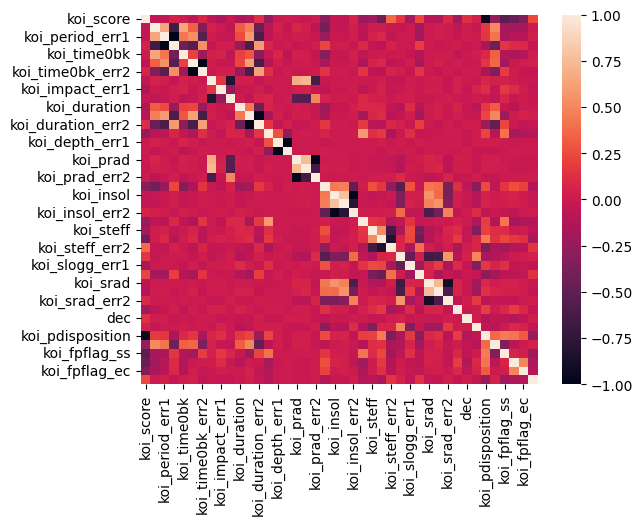

In [80]:
plt.figure(figsize=(20, 20))
sns.heatmap(x_train_scaled.corr())

### Plotting heatmap of the complete dataset to select the best columns and avoid overfitting.

In [ ]:
df.columns

Index(['koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',
       'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra',
       'dec', 'koi_kepmag'],
      dtype='object')

In [ ]:
df2_scaled.columns

Index(['koi_score', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag',
       'koi_disposition', 'koi_pdisposition', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_tce_plnt_num',
       'koi_disposition_le'],
      dtype='object')

### The following columns are dropped because their value lies near 0 in the correlation matrix.

In [ ]:
df2_scaled = df2_scaled.drop(['koi_score', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag', 'koi_tce_plnt_num'], axis=1)

In [ ]:
# df2_scaled = df2_scaled.drop(['koi_fpflag_nt', 'koi_fpflag_ss',
#        'koi_fpflag_co', 'koi_fpflag_ec'], axis=1)

In [ ]:
df2_scaled.dropna(subset=["koi_disposition"], inplace=True)

### Seperating the rows which are assigned CANDIDATES.

In [ ]:
df_non_candidates = df2_scaled[(df2_scaled["koi_disposition"] != "CANDIDATE")]
df_candidates = df2_scaled[(df2_scaled.koi_disposition == "CANDIDATE")]
df_candidates

,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disposition_le
37,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0
58,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0
62,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0
63,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0
72,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...
9073,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0
9082,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0
9084,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0
9086,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
target_non_candidates = df_non_candidates.koi_disposition_le
target_non_candidates

0       1
1       1
2       2
3       2
4       1
       ..
9085    2
9088    2
9089    2
9090    2
9091    2
Name: koi_disposition_le, Length: 6562, dtype: int32

### Splitting the dataset and keeping 30% for testing randomly.

In [81]:
lgr = LogisticRegression()
nb = GaussianNB()
rfc = RandomForestClassifier()
svc = SVC()

### Training and scoring the models.

In [82]:
lgr.fit(x_train_scaled, y_train)
nb.fit(x_train_scaled, y_train)
rfc.fit(x_train_scaled, y_train)
svc.fit(x_train_scaled, y_train)

SVC()

In [86]:
lgr_pred = lgr.predict(x_test_scaled)
svc_pred = svc.predict(x_test_scaled)
nb_pred = nb.predict(x_test_scaled)
rfc_pred = rfc.predict(x_test_scaled)

In [87]:
def score(a, b):
        print(f"Accuracy: {accuracy_score(a, b)}")
        print(f"Precision: {precision_score(a, b)}")
        print(f"F1 score: {f1_score(a, b)}")
        print(f"Recall: {recall_score(a, b)}")

In [88]:
score(lgr_pred, y_test)

Accuracy: 0.9946987951807229
Precision: 1.0
F1 score: 0.9960644007155635
Recall: 0.99215965787598


In [89]:
score(svc_pred, y_test)

Accuracy: 0.9942168674698795
Precision: 1.0
F1 score: 0.9957081545064378
Recall: 0.9914529914529915


In [90]:
score(nb_pred, y_test)

Accuracy: 0.9918072289156626
Precision: 0.9956896551724138
F1 score: 0.9939046253137325
Recall: 0.9921259842519685


In [91]:
score(rfc_pred, y_test)

Accuracy: 0.9946987951807229
Precision: 1.0
F1 score: 0.9960644007155635
Recall: 0.99215965787598


### Plotting confusion matrices.

In [92]:
def conf_matrix(y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        display = ConfusionMatrixDisplay(confusion_matrix=cm)
        display.plot()
        plt.show()

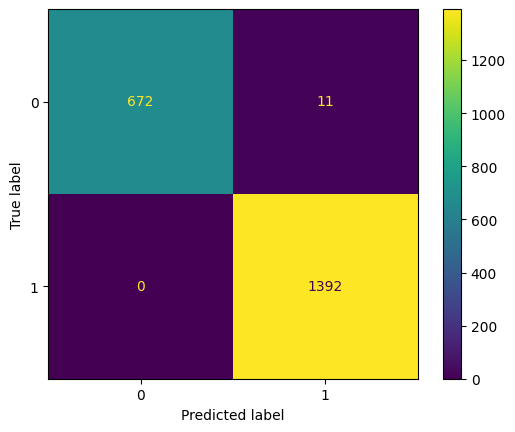

In [93]:
conf_matrix(y_test, rfc_pred)

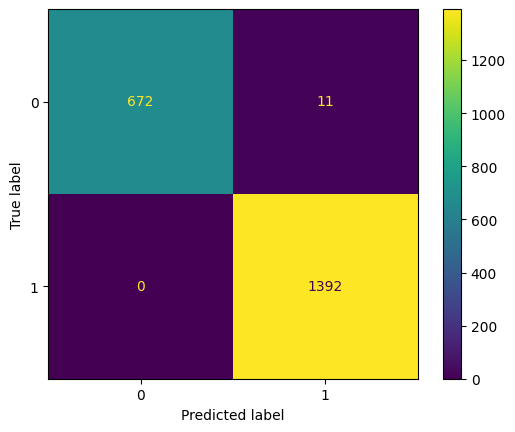

In [94]:
conf_matrix(y_test, lgr_pred)

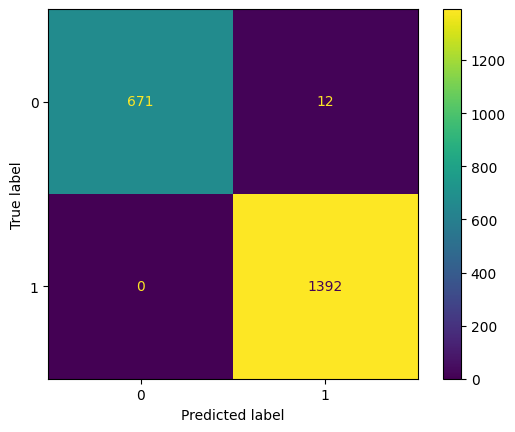

In [95]:
conf_matrix(y_test, svc_pred)

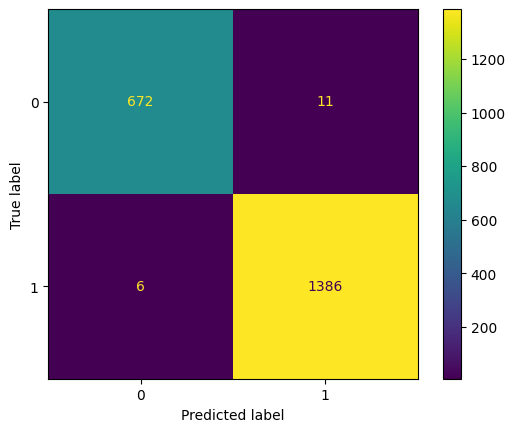

In [96]:
conf_matrix(y_test, nb_pred)